# 🏞️ Data visualization - Land data

## Load packages and data

In [80]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/clean/land-data.csv")

# Set sns theme
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_context("paper")

## Summary of the data

In [81]:
print(df.describe())
print(df['District'].unique())

              Price  AreaAssigned   PricePerSqm
count  2.134100e+04  2.134100e+04  21341.000000
mean   1.728421e+05  2.922473e+06    100.462304
std    5.412115e+05  4.204448e+08    212.123423
min    3.000000e+02  1.500000e+01      0.000001
25%    3.500000e+04  6.100000e+02      9.900990
50%    6.000000e+04  1.930000e+03     36.815920
75%    1.200000e+05  5.787000e+03    108.490566
max    2.000000e+07  6.142007e+10   6049.382716
['Faro' 'Leiria' 'Porto' 'Guarda' 'Setúbal' 'Viseu' 'Lisboa' 'Coimbra'
 'Aveiro' 'Évora' 'Santarém' 'Braga' 'Bragança' 'Beja' 'Vila Real'
 'Castelo Branco' 'Ilha de São Miguel' 'Ilha de Porto Santo'
 'Ilha de Santa Maria' 'Ilha Terceira' 'Viana do Castelo'
 'Ilha da Madeira' 'Portalegre']


In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         21341 non-null  float64
 1   District      21341 non-null  object 
 2   City          21341 non-null  object 
 3   AreaAssigned  21341 non-null  float64
 4   Type          21341 non-null  object 
 5   PricePerSqm   21341 non-null  float64
 6   Region        21341 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.1+ MB
None


## Number of cases per city

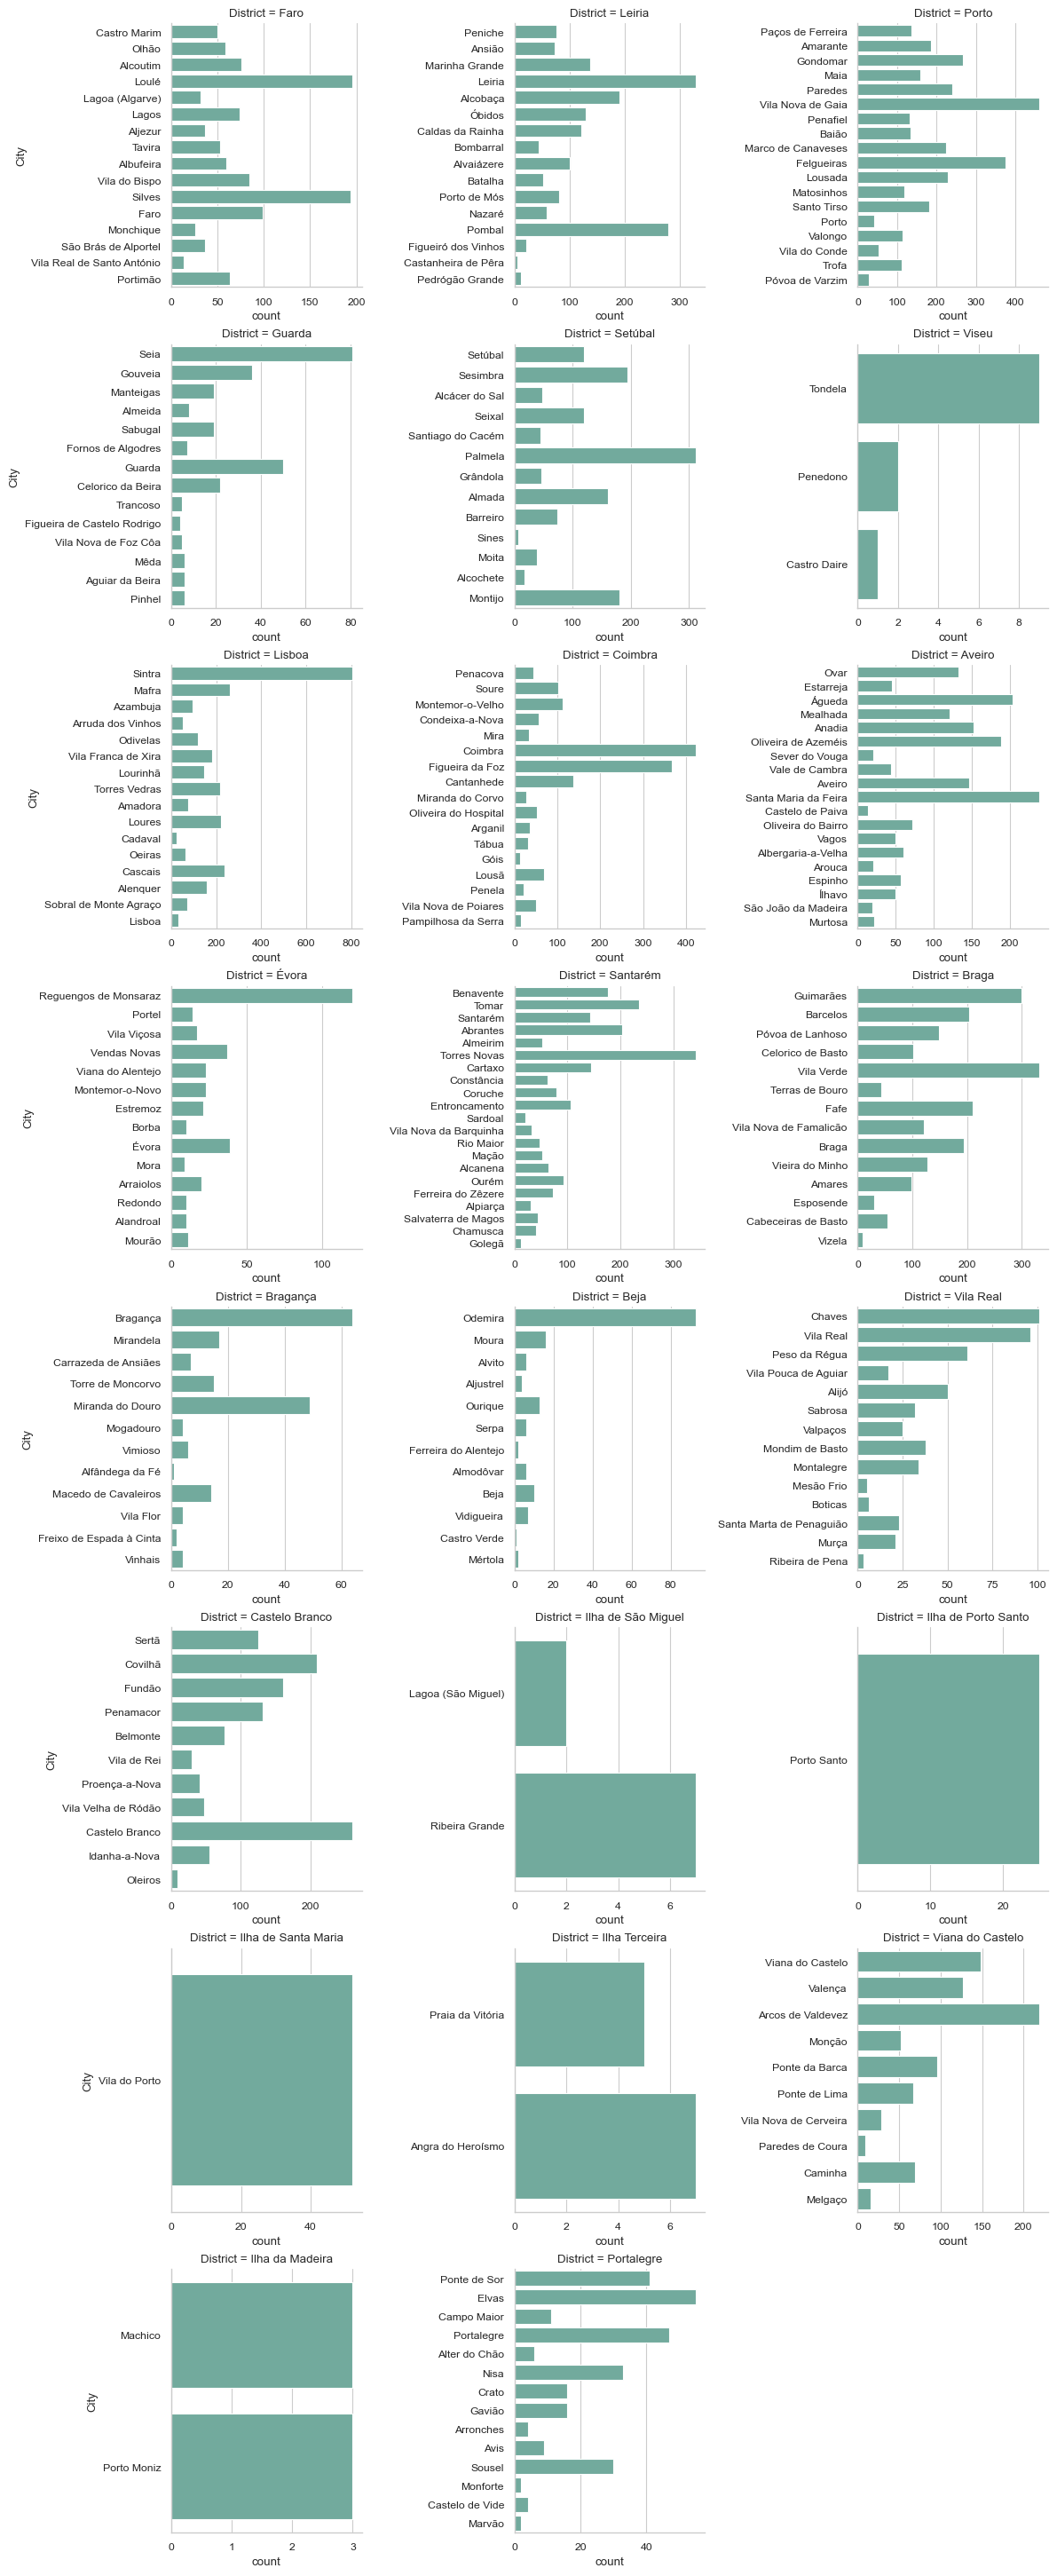

In [83]:
g = sns.FacetGrid(df, col="District", col_wrap=3, height=4, sharey=False, sharex=False)

g.map_dataframe(
    sns.countplot,
    y="City", 
    color='#69b3a2'
)

plt.subplots_adjust(top=0.9)
plt.show()



## Area impact on the price

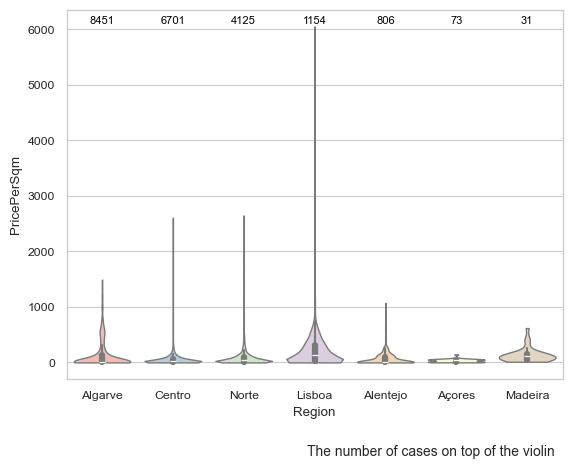

In [87]:

# Calculate medians and number of observations
medians = df.groupby(['Region'])['PricePerSqm'].median().values
nobs = df['Region'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
  
ax = sns.violinplot(x="Region", y="PricePerSqm", hue="Region", data=df, cut=0)
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], 6100, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='black')

# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.show()

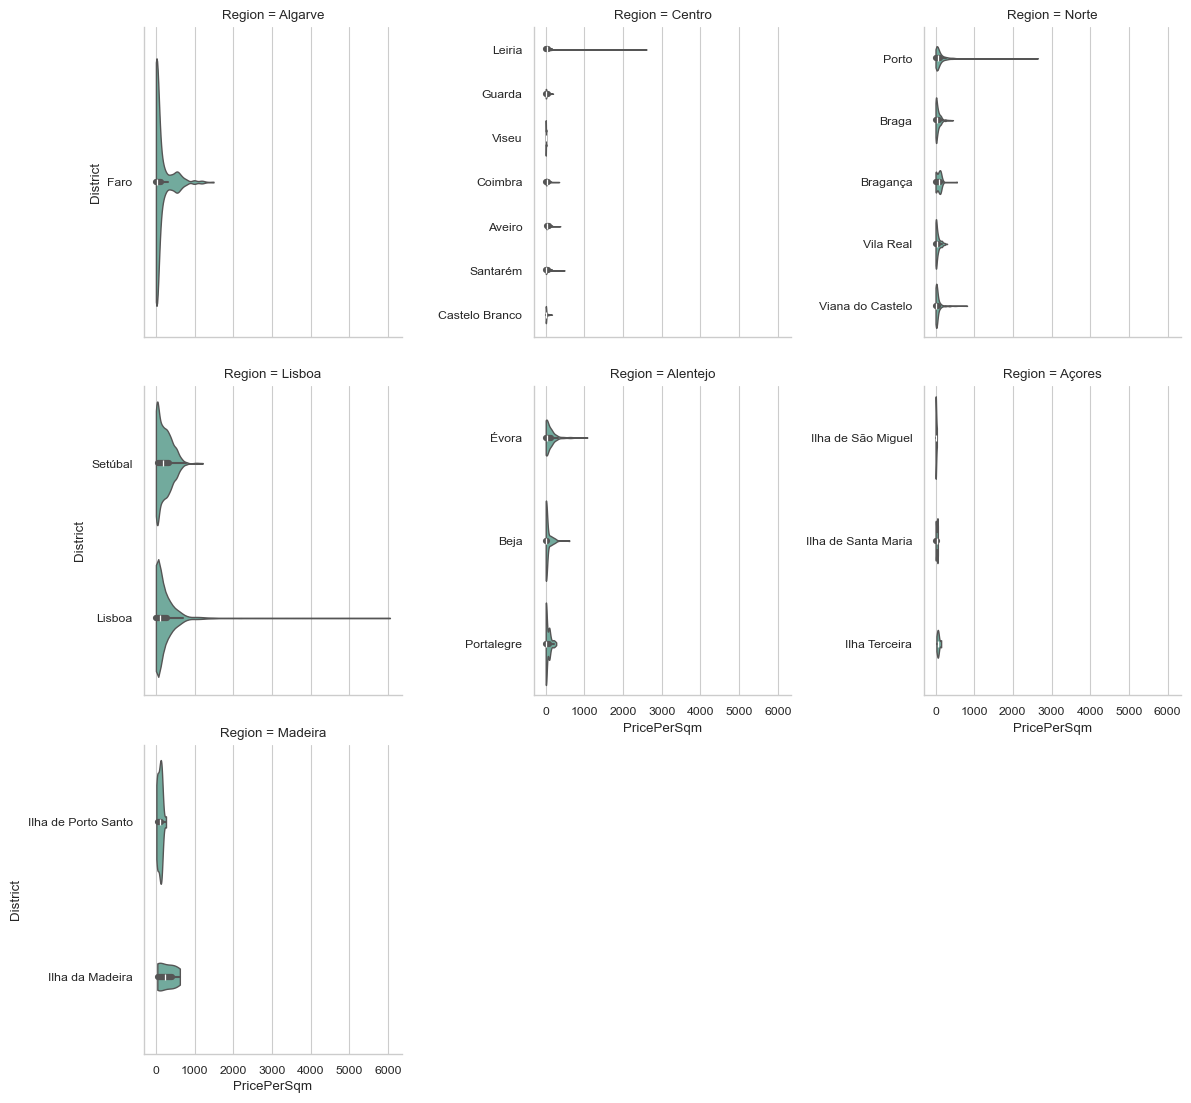

In [85]:
g = sns.FacetGrid(df, col="Region", col_wrap=3, height=4, sharey=False, sharex=True)

# Overlay datapoints
g.map_dataframe(
    sns.violinplot,
    x="PricePerSqm",
    y="District",
    color="#69b3a2",
    cut=0,
)

plt.subplots_adjust(top=0.9)
plt.show()

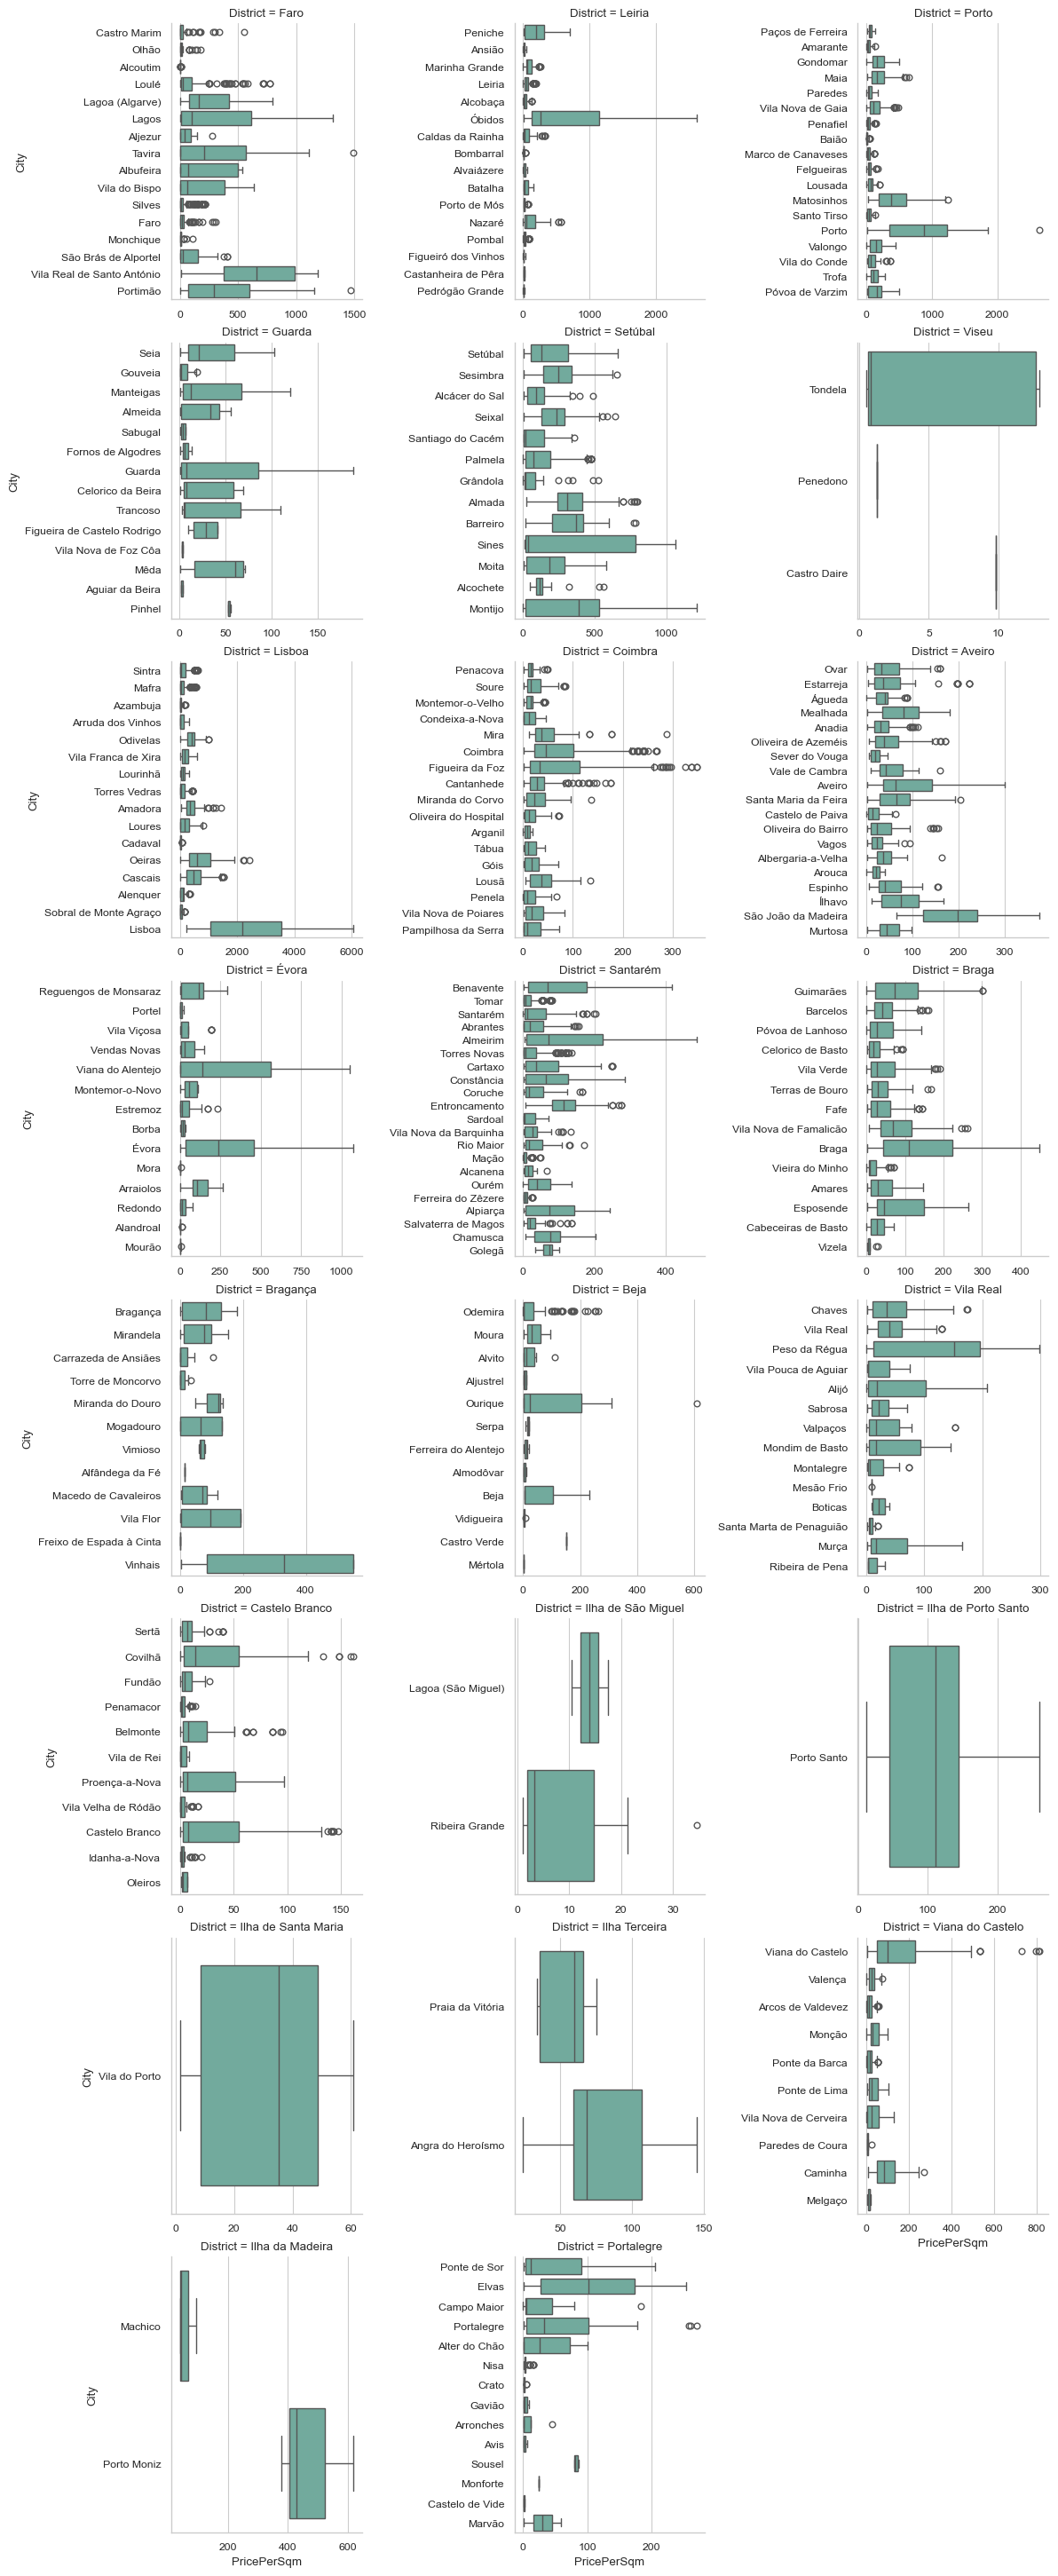

In [86]:
g = sns.FacetGrid(df, col="District", col_wrap=3, height=4, sharey=False, sharex=False)

# Overlay datapoints
g.map_dataframe(
    sns.boxplot,
    x="PricePerSqm",
    y="City",
    color="#69b3a2",
)

plt.subplots_adjust(top=0.9)
plt.show()